# Практическая работа №6
## Тема: Кластеризация
Выполнила Фонград Анастасия КИ21-16/1б

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from typing import Any
from itertools import product
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, \
    completeness_score, v_measure_score, silhouette_score, accuracy_score

warnings.filterwarnings('ignore')

In [2]:
df_w = load_wine(as_frame=True).frame
x, y = df_w.drop("target", axis=1), df_w["target"]
df_w

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [40]:
def plot_2d_pca(x, y, c_centers=None, title=None):
    """

    :param x:
    :param y:
    :param c_centers:
    :param title:
    :return:
    """
    plt.set_cmap('gist_rainbow')
    pca = PCA(n_components=2, random_state=42)
    x_pca = pca.fit_transform(x)
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
    plt.xlabel("Первый главный признак")
    plt.ylabel("Второй главный признак")
    if title is not None:
        plt.title(title)
    if c_centers is not None:
        c_centers = pca.transform(c_centers)
        plt.scatter(c_centers[:, 0], c_centers[:, 1],
                    c=np.arange(c_centers.shape[0]), marker="+", s=300)
    plt.show()

In [ ]:
def plot_pca(x, y, c_centers=None):
    pass

In [41]:
def plot_3d_pca(x, y, c_centers=None, title=None):
    pca = PCA(n_components=3, random_state=42)
    pca.fit(x)
    PCA_ds = pd.DataFrame(pca.transform(x), columns=(["col1","col2", "col3"]))
    x_c =PCA_ds["col1"]
    y_c =PCA_ds["col2"]
    z_c =PCA_ds["col3"]
    #To plot
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(x_c, y_c, z_c, c=y)
    ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
    plt.show()

In [42]:
def count_scores(x, y, y_pred):
    """

    :param x:
    :param y:
    :param y_pred:
    :return:
    """
    return pd.Series({
        'Adjusted Rand Index': adjusted_rand_score(y, y_pred),
        'Adjusted Mutual Information': adjusted_mutual_info_score(y, y_pred),
        'Homogeneity Score': homogeneity_score(y, y_pred),
        'Completeness Score': completeness_score(y, y_pred),
        'V-Measure Score': v_measure_score(y, y_pred),
        'Silhouette Score': silhouette_score(x, y_pred),
        'Accuracy': (accuracy := accuracy_score(y, y_pred)),
        'Mistake Rate': 1 - accuracy
    })

## Визуализация исходных данных

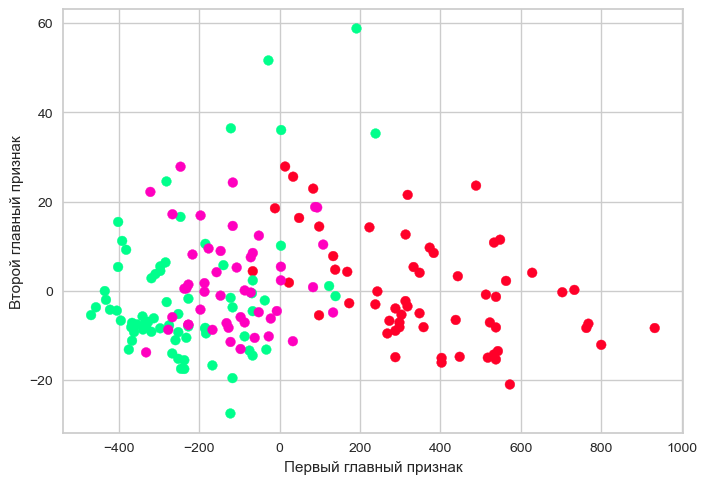

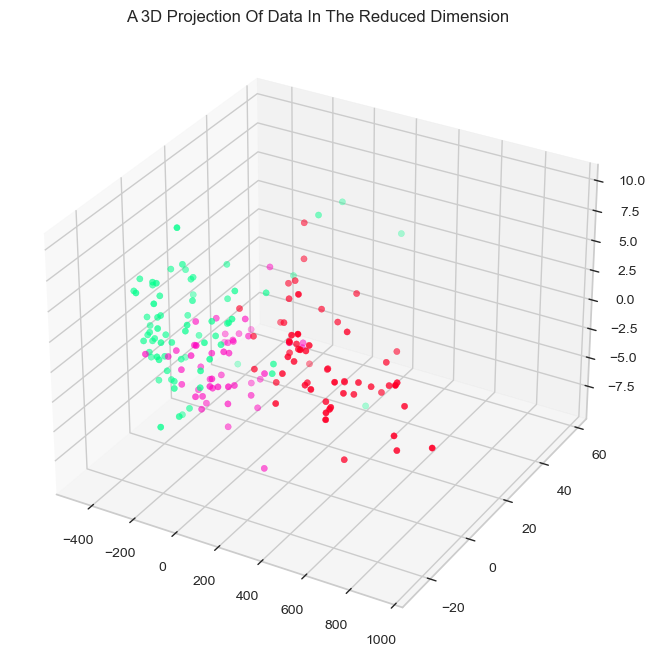

In [43]:
plot_pca(x, y)
plot_3d_pca(x, y)

## Оценка и визуализация K-means

3


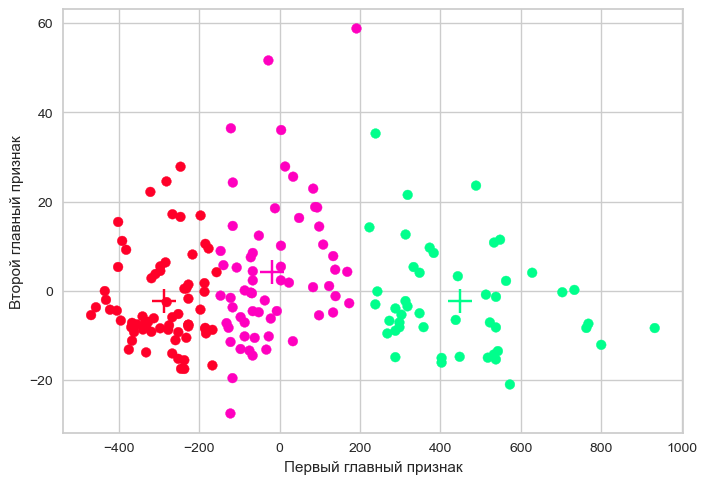

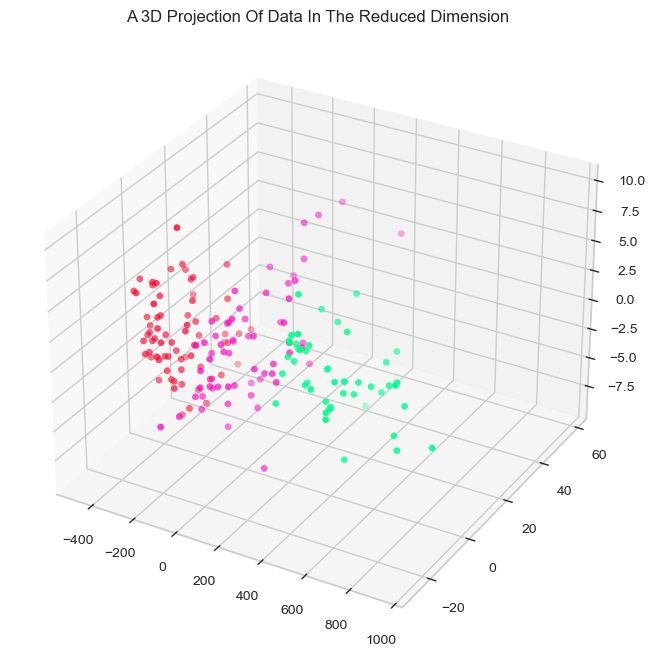

In [44]:
cl_count = np.unique(y if isinstance(y, np.ndarray) else y.values).size
print(cl_count)
km = KMeans(n_clusters=cl_count, random_state=42).fit(x)
plot_pca(x, km.labels_, c_centers=km.cluster_centers_)
count_scores(x, y, km.labels_)
plot_3d_pca(x, km.labels_)

## Правило локтя

In [7]:
def elbow_rule(x, title="Elbow method"):
    visualizer = KElbowVisualizer(KMeans(random_state=42),
                                  param_grid={"n_clusters": range(1, 11)},
                                  title=title)
    visualizer.fit(x)
    visualizer.show()
    return visualizer.elbow_value_

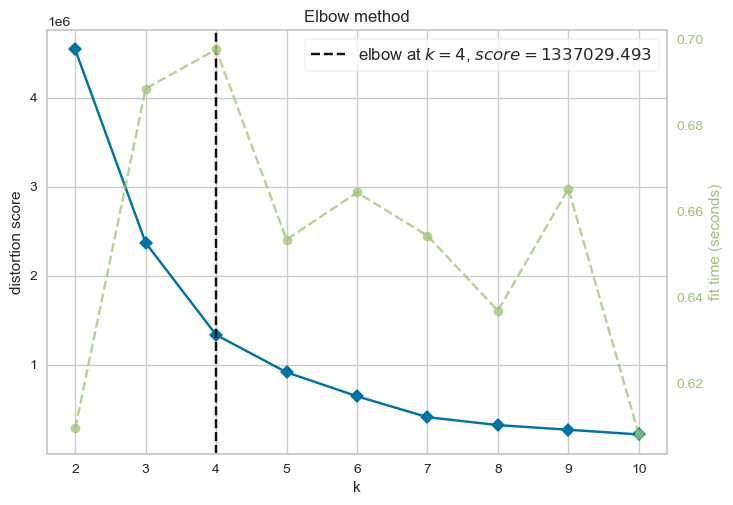

In [8]:
elbow_value = elbow_rule(x)

4


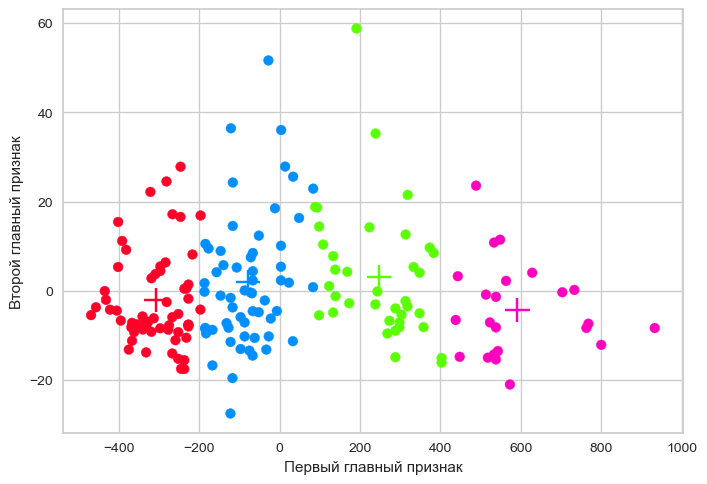

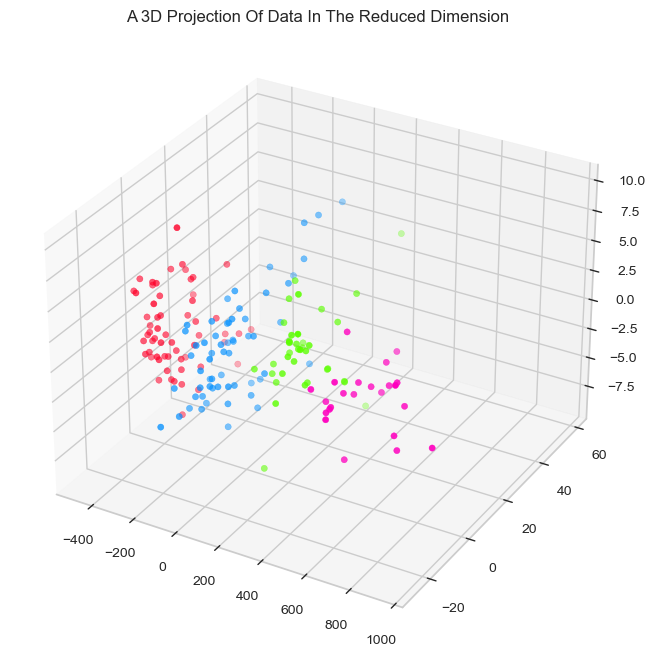

In [45]:
print(elbow_value)
km = KMeans(n_clusters=elbow_value, random_state=42).fit(x)
plot_pca(x, km.labels_, c_centers=km.cluster_centers_)
count_scores(x, y, km.labels_)
plot_3d_pca(x, km.labels_)

## Spectral clustering

In [10]:
def create_cluster(cluster: Any, param_grid: dict[str, tuple[Any]]) -> Any:
    clusters = []
    score = []
    param_grid = [dict(zip(param_grid.keys(), values))
                  for values in tuple(product(*param_grid.values()))]
    for params in param_grid:
        clusters += cluster(**params),
        score += adjusted_rand_score(y, clusters[-1].fit_predict(x)),

    return clusters[score.index(max(score))]

In [12]:
params = {
    "n_clusters": range(2, 10),
    "gamma": tuple(map(lambda a: a / 100, range(90, 110))),
    "assign_labels": ("kmeans", "discretize", "cluster_qr")
}

cluster = create_cluster(SpectralClustering, params)
print(cluster)


KeyboardInterrupt

